In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [22]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip



In [25]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [26]:
total_train,total_val,total_test


(2001, 1001, 51)

In [43]:
# 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the image dimensions
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Define batch size
BATCH_SIZE = 32

train_image_generator = ImageDataGenerator(rescale=1.0/255)
validation_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)


train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          batch_size=BATCH_SIZE,
                                                          class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=BATCH_SIZE,
                                                              class_mode='binary')
# test_image_generator
# #test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
#                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                         batch_size=1,  # Set batch size to 1 for test data
#                                                         class_mode=None,  # Set class_mode to None for test data
#                                                         shuffle=False)  # Disable shuffling for test data


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import os
# List the files in the test directory
test_files = os.listdir(test_dir)

test_files


In [ ]:
import os

test_files = os.listdir(test_dir)

# Filter out non-image files (assuming you want only .jpg files)
image_files = [file for file in test_files if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

image_files


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

# Loop through image files, load, and display them
for filename in image_files:
    # Construct the full path to the image
    image_path = os.path.join(test_dir, filename)

    # Load the image
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))

    # Convert the image to a numpy array
    img_array = img_to_array(img) / 255.0  # Normalize pixel values

    # Display the image
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()


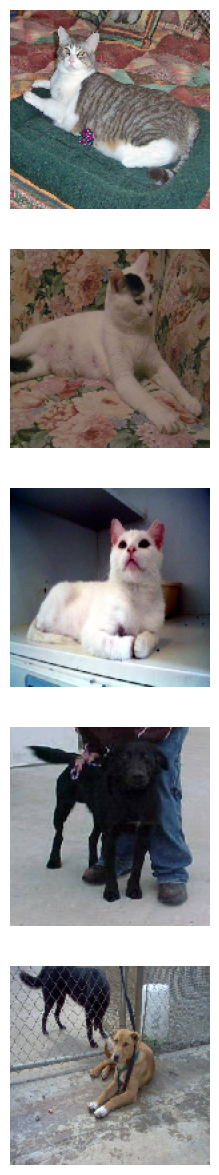

In [39]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [44]:
# 5
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator for training data with data augmentation
train_image_generator_aug = ImageDataGenerator(
    rescale=1.0/255,  # Rescale pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images in the range of -40 to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear intensity (shear angle) for random shearing
    zoom_range=0.2,  # Randomly zoom in on images up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Strategy for filling in newly created pixels (in case of transformations)
)

train_data_gen_augmentated = train_image_generator_aug.flow_from_directory(directory=train_dir,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          batch_size=BATCH_SIZE,
                                                          class_mode='binary')



Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


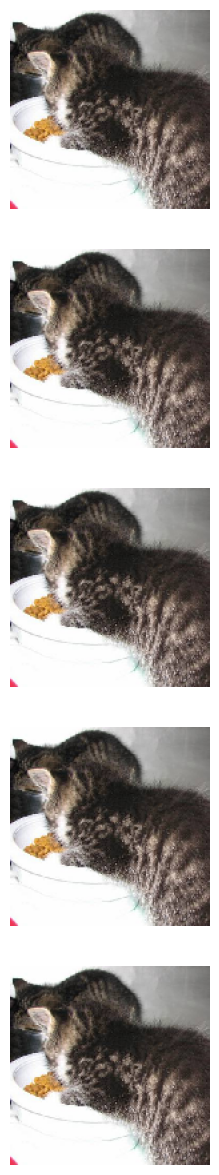

In [45]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [48]:
# 7
from tensorflow import keras
from tensorflow.keras import layers

# Create a Sequential model
model = keras.Sequential()

# Add a Convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Add a MaxPooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add another Convolutional layer with 64 filters and a 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer with 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add a third Convolutional layer with 64 filters and a 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Add a fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 1 unit (binary classification) and sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',  # You can choose a different optimizer if needed
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [49]:
# 8
# Define the number of steps per epoch based on the size of the training dataset
# For example, if you have 2000 training images and a batch size of 32, set steps_per_epoch to 2000 / 32 = 62
steps_per_epoch = total_train // batch_size

# Define the number of validation steps based on the size of the validation dataset
# For example, if you have 1000 validation images and a batch size of 32, set validation_steps to 1000 / 32 = 31
validation_steps = total_val // batch_size

# Train the model
history = model.fit(train_data_gen,  # Training data generator
                    steps_per_epoch=steps_per_epoch,  # Number of steps per epoch
                    epochs=epochs,  # Number of training epochs
                    validation_data=val_data_gen,  # Validation data generator
                    validation_steps=validation_steps)  # Number of validation steps


Epoch 1/15
15/15 [==============================] - 85s 6s/step - loss: 0.9014 - accuracy: 0.5123 - val_loss: 0.6796 - val_accuracy: 0.6473
Epoch 2/15
15/15 [==============================] - 81s 5s/step - loss: 0.6515 - accuracy: 0.6330 - val_loss: 0.7323 - val_accuracy: 0.5402
Epoch 3/15
15/15 [==============================] - 79s 5s/step - loss: 0.6379 - accuracy: 0.6651 - val_loss: 0.6831 - val_accuracy: 0.5268
Epoch 4/15
15/15 [==============================] - 80s 5s/step - loss: 0.5507 - accuracy: 0.7228 - val_loss: 0.6103 - val_accuracy: 0.6741
Epoch 5/15
15/15 [==============================] - 80s 5s/step - loss: 0.4808 - accuracy: 0.7692 - val_loss: 0.5473 - val_accuracy: 0.7188
Epoch 6/15
15/15 [==============================] - 82s 5s/step - loss: 0.4308 - accuracy: 0.7954 - val_loss: 0.6018 - val_accuracy: 0.6875
Epoch 7/15
15/15 [==============================] - 80s 5s/step - loss: 0.4096 - accuracy: 0.8050 - val_loss: 0.5167 - val_accuracy: 0.7366
Epoch 8/15
15/15 [==

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")